In [198]:
import pandas as pd
from bs4 import BeautifulSoup     
import re
import numpy as np
from nltk.corpus import stopwords
import nltk.data
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import word2vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

%matplotlib notebook

Based off [Kaggle Competition](https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors)

In [4]:
trn_unl = pd.read_csv('data/unlabeledTrainData.tsv',sep = '\t', quoting = 3)
trn_lab = pd.read_csv('data/labeledTrainData.tsv',sep = '\t', quoting = 3)
tst_data = pd.read_csv('data/testData.tsv',sep = '\t', quoting = 3)

In [5]:
trn_unl.shape
trn_lab.shape
tst_data.shape

(50000, 2)

(25000, 3)

(25000, 2)

In [90]:
stops = set(stopwords.words("english")) 

def review_to_words(raw_review, remove_stop = False):
    text = re.sub("[^a-zA-Z]"," ",BeautifulSoup(raw_review,'html5lib').get_text()).lower()
    words = text.split()
    if remove_stop:
        words = [w for w in words if not w in stops]
    return words

Split the reviews into sentences

In [91]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    '''
    Function to split a review into parsed sentences. Returns a 
    list of sentences, where each sentence is a list of words
    '''
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append(review_to_words( raw_sentence, remove_stopwords ))
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [8]:
%store

Stored variables and their in-db values:
encs_merge                       ->                                                  e
encs_merge_ffill_tda             ->        male    height     bun  o2sat  paco2      w
encs_merge_tda                   ->        male    height   bun  o2sat  paco2      wei
sents                            -> [['with all this stuff going down at the moment wi


In [9]:
# %store sents
%store -r sents

In [92]:
sentences = []
for x in trn_lab.review:
    sentences += review_to_sentences(x,tokenizer)
for x in trn_unl.review:
    sentences += review_to_sentences(x,tokenizer)
# sentences = [review_to_sentences(x,tokenizer) ]
# sentences2 = [review_to_sentences(x,tokenizer) for x in trn_unl.review]
# sents = sentences+sentences2
# sents2 = []
# for x in sents:
#     sents2 += x

/home/msnow/miniconda3/envs/cord_comp/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/msnow/miniconda3/envs/cord_comp/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/msnow/miniconda3/envs/cord_comp/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Sou

In [104]:
# Import the built-in logging module and configure it so that Word2Vec creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 8       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [122]:
# Initialize and train the model (this will take some time)

# print("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

2018-01-09 13:39:25,458 : INFO : collecting all words and their counts
2018-01-09 13:39:25,459 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-09 13:39:25,546 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2018-01-09 13:39:25,613 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types
2018-01-09 13:39:25,661 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types
2018-01-09 13:39:25,708 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types
2018-01-09 13:39:25,753 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
2018-01-09 13:39:25,799 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
2018-01-09 13:39:25,846 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
2018-01-09 13:39:25,894 : INFO : PROGRESS: 

2018-01-09 13:39:28,737 : INFO : PROGRESS: at sentence #720000, processed 16105665 words, keeping 118221 word types
2018-01-09 13:39:28,782 : INFO : PROGRESS: at sentence #730000, processed 16332046 words, keeping 118954 word types
2018-01-09 13:39:28,825 : INFO : PROGRESS: at sentence #740000, processed 16553079 words, keeping 119668 word types
2018-01-09 13:39:28,869 : INFO : PROGRESS: at sentence #750000, processed 16771406 words, keeping 120295 word types
2018-01-09 13:39:28,911 : INFO : PROGRESS: at sentence #760000, processed 16990810 words, keeping 120930 word types
2018-01-09 13:39:28,962 : INFO : PROGRESS: at sentence #770000, processed 17217947 words, keeping 121703 word types
2018-01-09 13:39:29,006 : INFO : PROGRESS: at sentence #780000, processed 17448093 words, keeping 122402 word types
2018-01-09 13:39:29,048 : INFO : PROGRESS: at sentence #790000, processed 17675169 words, keeping 123066 word types
2018-01-09 13:39:29,072 : INFO : collected 123504 word types from a corp

In [115]:
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2018-01-09 11:04:27,728 : INFO : precomputing L2-norms of word weight vectors
2018-01-09 11:04:27,927 : INFO : saving Word2Vec object under 300features_40minwords_10context, separately None
2018-01-09 11:04:27,928 : INFO : not storing attribute syn0norm
2018-01-09 11:04:27,929 : INFO : not storing attribute cum_table
2018-01-09 11:04:28,441 : INFO : saved 300features_40minwords_10context


Below are some of the propeties you can extract from the model for an exhaustive list see the genism documentation
[word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
and [keyed vectors](https://radimrehurek.com/gensim/models/keyedvectors.html)

In [147]:
# list of words
w2v_words = model.wv.index2word

# Word vector
w2v_vect = model.wv[w2v_words[0]]

# Word Array
w2v_array = model.wv.syn0
w2v_array.shape

# Word Similarity
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])
model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])
model.wv.most_similar("queen")

# see https://radimrehurek.com/gensim/models/keyedvectors.html for more features

(16490, 300)

[('queen', 0.544121265411377),
 ('princess', 0.5060864686965942),
 ('prince', 0.4838801622390747),
 ('marian', 0.44278112053871155),
 ('rudolf', 0.43517571687698364),
 ('lion', 0.4346824288368225),
 ('kings', 0.43124276399612427),
 ('duchess', 0.4262383282184601),
 ('throne', 0.42373138666152954),
 ('bride', 0.41486889123916626)]

[('queen', 0.8595770597457886),
 ('princess', 0.8224307298660278),
 ('prince', 0.7903465628623962),
 ('marian', 0.7831131219863892),
 ('antoinette', 0.7679733633995056),
 ('fontaine', 0.7674945592880249),
 ('latifah', 0.7673478722572327),
 ('duchess', 0.7672377824783325),
 ('sybil', 0.7644374966621399),
 ('elizabeth', 0.7627924680709839)]

[('princess', 0.655472993850708),
 ('victoria', 0.5922859311103821),
 ('bride', 0.5916612148284912),
 ('mistress', 0.5905460119247437),
 ('stepmother', 0.583812952041626),
 ('belle', 0.5743547677993774),
 ('maid', 0.5684834122657776),
 ('goddess', 0.5648435950279236),
 ('duchess', 0.5553698539733887),
 ('dame', 0.5434373617172241)]

In [151]:
pca = PCA(n_components = 2)
w2v_pca = pca.fit_transform(w2v_array)
w2v_pca.shape

(16490, 2)

In [161]:
aa = w2v_pca[:,1].shape
aa

(16490,)

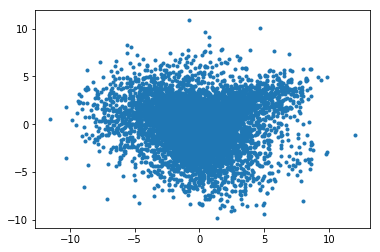

In [165]:
x = w2v_pca[:,0]
y = w2v_pca[:,1]
plt.plot(x,y,'.')
plt.show()

<IPython.core.display.Javascript object>


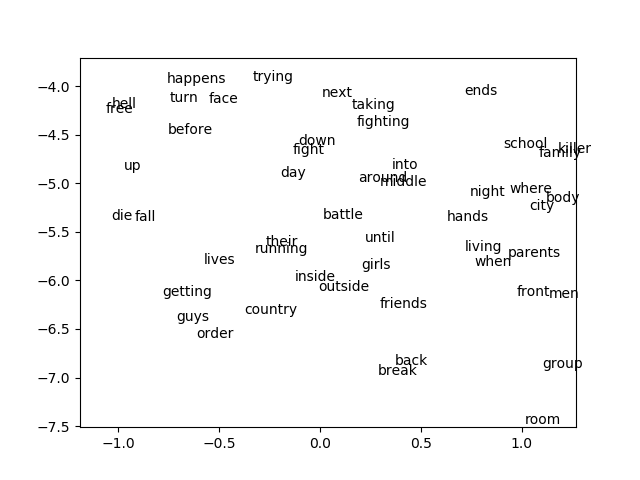

In [197]:
plt.scatter(list(x), list(y), marker='.', color = 'w')
for i in range(1000):
    plt.annotate(w2v_words[i],xy=(x[i],y[i]))
# for label, x1, y1 in zip(w2v_words, list(x), list(y)):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(0, 0))
# #         textcoords='offset points', ha='right', va='bottom',)

In [206]:
# vocab = list(model.wv.vocab)
# X = model[vocab]
# w2v_words 
# w2v_array = model.wv.syn0
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(w2v_array[:1000,:])

In [209]:
df = pd.DataFrame(X_tsne, index=w2v_words[:1000], columns=['x', 'y'])
df.head()

,x,y
the,-0.689075,0.884100
and,-4.609788,-0.156650
a,-1.598323,22.473783
of,-2.236683,1.253906
to,-14.387425,10.145951


<IPython.core.display.Javascript object>


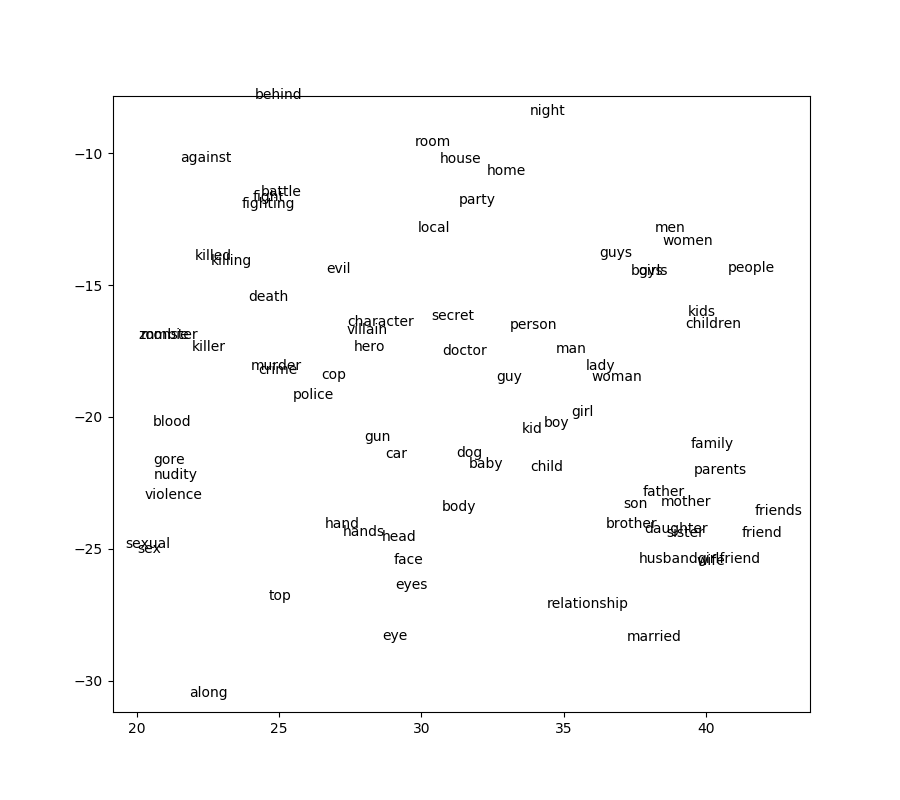

In [218]:
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'],marker='.',color='w')
for word, pos in df.iterrows():
    ax.annotate(word, pos)

In [22]:
clean_reviews = [review_to_words(trn_lab.review[x]) for x in range(trn_lab.shape[0])]

In [29]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 


In [44]:
train_data_features = vectorizer.fit_transform(clean_reviews)
train_data_features = train_data_features.toarray()

In [46]:
train_data_features.shape
# clean_reviews[0].split(" ")

(25000, 5000)

In [48]:
df = pd.DataFrame(train_data_features)

In [56]:
vocab = vectorizer.get_feature_names()
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print(count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

161 exists
104 exotic
1176 expect
404 expectations
704 expected
588 expecting
81 expedition
140 expensive
1059 experience
192 experienced
200 experiences
170 experiment
79 experimental
90 experiments
176 expert
451 explain
285 explained
107 explaining
193 explains
290 explanation
119 explicit
233 exploitation
92 exploration
118 explore
106 explored
112 explosion
109 explosions
117 exposed
82 exposure
189 express
83 expressed
169 expression
155 expressions
115 extended
171 extent
315 extra
173 extraordinary
228 extras
350 extreme
1069 extremely
849 eye
133 eyed
1216 eyes
115 eyre
178 fabulous
1645 face
204 faced
345 faces
177 facial
96 facing
3523 fact
218 factor
142 factory
224 facts
285 fail
483 failed
119 failing
606 fails
247 failure
455 fair
587 fairly
214 fairy
297 faith
178 faithful
473 fake
122 falk
770 fall
165 fallen
383 falling
851 falls
193 false
230 fame
538 familiar
239 families
3200 family
771 famous
1911 fan
119 fancy
1421 fans
798 fantastic
649 fantasy
2978 far
122 farc

300 player
286 players
1633 playing
2214 plays
234 pleasant
124 pleasantly
1045 please
127 pleased
309 pleasure
632 plenty
91 plight
6585 plot
285 plots
645 plus
85 poem
96 poetic
92 poetry
156 poignant
3225 point
135 pointed
504 pointless
814 points
93 pokemon
106 polanski
1097 police
85 polished
608 political
106 politically
208 politics
153 pool
1897 poor
713 poorly
316 pop
112 popcorn
89 pops
550 popular
83 popularity
113 population
366 porn
98 porno
104 portion
145 portrait
264 portray
508 portrayal
601 portrayed
227 portraying
229 portrays
179 position
518 positive
108 possessed
98 possibilities
107 possibility
999 possible
709 possibly
483 post
120 poster
100 pot
612 potential
91 potentially
133 poverty
213 powell
948 power
620 powerful
317 powers
234 practically
100 practice
171 praise
309 pre
121 precious
854 predictable
175 prefer
178 pregnant
78 premiere
712 premise
171 prepared
85 prequel
410 presence
616 present
160 presentation
415 presented
207 presents
251 president
127

160 topic
101 topless
154 torn
300 torture
116 tortured
631 total
1307 totally
472 touch
170 touched
206 touches
435 touching
479 tough
154 tour
285 toward
637 towards
1279 town
169 toy
107 toys
399 track
105 tracks
165 tracy
140 trade
81 trademark
162 tradition
257 traditional
362 tragedy
348 tragic
83 trail
377 trailer
102 trailers
411 train
97 trained
218 training
95 transfer
100 transformation
91 transition
117 translation
124 trap
188 trapped
504 trash
99 trashy
246 travel
101 traveling
105 travels
84 travesty
202 treasure
320 treat
275 treated
235 treatment
97 treats
175 tree
104 trees
259 trek
127 tremendous
152 trial
84 tribe
138 tribute
171 trick
137 tricks
773 tried
1274 tries
216 trilogy
112 trio
492 trip
152 trite
115 triumph
89 troops
522 trouble
145 troubled
84 troubles
174 truck
2333 true
1743 truly
321 trust
700 truth
1830 try
2473 trying
79 tube
145 tune
119 tunes
173 turkey
1359 turn
925 turned
122 turner
344 turning
1251 turns
2782 tv
115 twelve
299 twenty
387 twice
